# 📊 Trader Behavior vs Market Sentiment Analysis

This project analyzes how Bitcoin market sentiment (Fear/Greed) affects trader performance and behavior.

## Objective:
- Understand relationship between sentiment and PnL
- Analyze trader behavior
- Provide actionable trading strategies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

In [4]:
print("Sentiment Shape:", sentiment.shape)
print("Trades Shape:", trades.shape)

print("\nSentiment Missing Values:\n", sentiment.isnull().sum())
print("\nTrades Missing Values:\n", trades.isnull().sum())

print("\nSentiment Duplicates:", sentiment.duplicated().sum())
print("Trades Duplicates:", trades.duplicated().sum())

Sentiment Shape: (2644, 4)
Trades Shape: (211224, 16)

Sentiment Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Sentiment Duplicates: 0
Trades Duplicates: 0


In [5]:
# Clean column names
sentiment.columns = sentiment.columns.str.strip().str.lower()
trades.columns = trades.columns.str.strip().str.lower().str.replace(' ', '_')

print(sentiment.columns)
print(trades.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')


In [6]:
# Convert sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# Convert trades timestamp
trades['timestamp_ist'] = pd.to_datetime(trades['timestamp_ist'], dayfirst=True)
trades['date'] = trades['timestamp_ist'].dt.date

In [7]:
merged = pd.merge(trades, sentiment, on='date', how='inner')

print("Merged Shape:", merged.shape)
merged.head()

Merged Shape: (211218, 20)


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


In [8]:
# Win column
merged['win'] = merged['closed_pnl'].apply(lambda x: 1 if x > 0 else 0)

# Trades per day
trades_per_day = merged.groupby('date').size()

# Average trade size
avg_trade_size = merged['size_usd'].mean()

print("Average Trade Size:", avg_trade_size)

Average Trade Size: 5639.191610563493


In [9]:
pnl_by_sentiment = merged.groupby('classification')['closed_pnl'].mean()
print(pnl_by_sentiment)

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: closed_pnl, dtype: float64


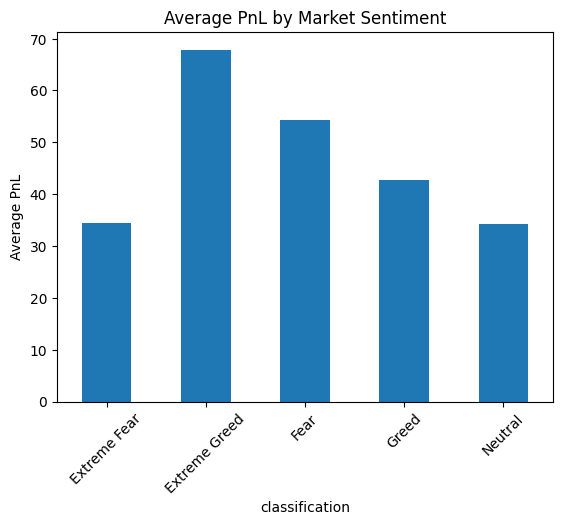

In [10]:
pnl_by_sentiment.plot(kind='bar')
plt.title("Average PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.show()

In [11]:
behavior = merged.groupby('classification').agg({
    'size_usd': 'mean',
    'closed_pnl': 'count'
}).rename(columns={'closed_pnl': 'trade_count'})

print(behavior)

                   size_usd  trade_count
classification                          
Extreme Fear    5349.731843        21400
Extreme Greed   3112.251565        39992
Fear            7816.109931        61837
Greed           5736.884375        50303
Neutral         4782.732661        37686


In [12]:
long_short = merged.groupby(['classification', 'side']).size()
print(long_short)

classification  side
Extreme Fear    BUY     10935
                SELL    10465
Extreme Greed   BUY     17940
                SELL    22052
Fear            BUY     30270
                SELL    31567
Greed           BUY     24576
                SELL    25727
Neutral         BUY     18969
                SELL    18717
dtype: int64


In [13]:
# Frequent vs Infrequent traders
trade_counts = merged['account'].value_counts()

frequent_traders = trade_counts[trade_counts > 50].index

merged['trader_type'] = merged['account'].apply(
    lambda x: 'Frequent' if x in frequent_traders else 'Infrequent'
)

segmentation = merged.groupby(['trader_type', 'classification'])['closed_pnl'].mean()

print(segmentation)

trader_type  classification
Frequent     Extreme Fear      34.537862
             Extreme Greed     67.892861
             Fear              54.290400
             Greed             42.743559
             Neutral           34.307718
Name: closed_pnl, dtype: float64


## 📌 Key Insights

1. Traders achieve highest profitability during Extreme Greed periods.
2. Fear conditions also show strong returns, indicating opportunity in market dips.
3. Neutral and Extreme Fear show lowest performance due to uncertainty.
4. Trader activity increases during Greed sentiment.

## 💡 Strategy Recommendations

### Strategy 1: Fear Market
- Focus on dip-buying opportunities
- Maintain controlled risk
- Avoid overtrading

### Strategy 2: Greed Market
- Use trend-following strategies
- Increase trade participation
- Apply strict risk management